In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re 
#import altair as alt

#alt.renderers.enable('notebook')

Import CPTAC data

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# Difference in protein abundance between mutated and non-mutated protein

In [4]:
protList = ['PTEN']
pcutoff = 0.05 / len(protList)
gene = 'PTEN'

proteomics = proteomics[:100]

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
#print(cross)

<b> Plot the data </b>

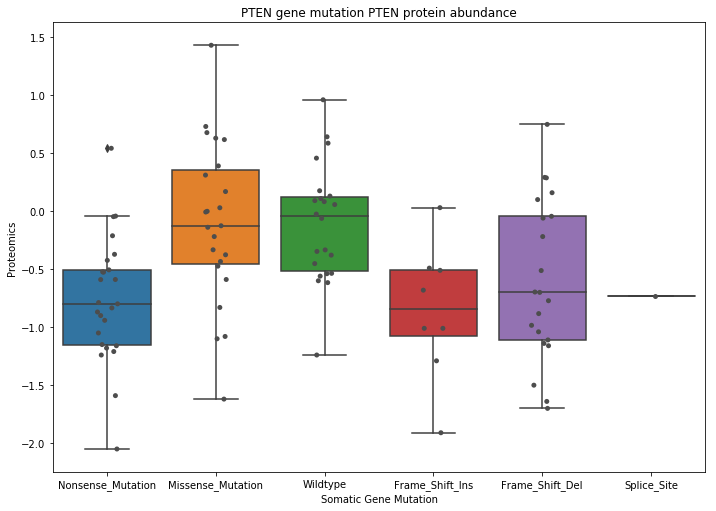

In [8]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=protein, ax = ax)
somatic_boxplot.set_title("PTEN gene mutation PTEN protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=protein,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# Difference in phosphoproteomics between mutated and non-mutated protein

In [9]:
sites = phos.columns
p_values = []
site_names = []
protein = 'PTEN'

pcutoff = 0.05/len(phos.columns)

pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            if ttest[1] < pcutoff:
                p_values.append(ttest[1])
                print(site, p_values)
                site_names.append(site)     
                
#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'
        

#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[1] 
#print("Adjusted p values: " + str(pvalues))
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[0]


#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))

#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

<b> Plot the data </b>

In [7]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[0])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[0] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[0],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

IndexError: list index out of range

## Patients who have a mutation on PTEN

In [11]:
p10_mutations = somatic_mutations.loc[somatic_mutations['Gene'] == 'PTEN']
mutated = p10_mutations.loc[p10_mutations['Mutation'] != 'Wildtype']
mutated_patients = p10_mutations['Patient_Id']

mutated_list = mutated_patients.tolist()

#get the number of unique patients in the list
unique_list = list()
for person in mutated_list:
    if person not in unique_list:
        unique_list.append(person)
    


print(len(mutated_list))

130
